<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula8b_entendendo_keans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)
k=5
kmeans = KMeans(n_clusters=k, init="random", n_init='auto', random_state=42)
y_pred = kmeans.fit_predict(X)

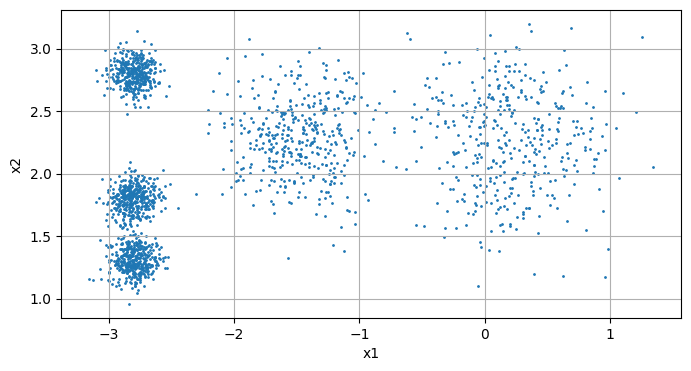

In [5]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("x1")
  plt.ylabel("x2")

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [8]:
y_pred

array([1, 3, 0, ..., 2, 0, 3], dtype=int32)

In [9]:
y_pred is kmeans.labels_

True

In [10]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348]])

In [11]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

In [13]:
X_new = np.array([[2,0], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([0, 0, 2, 2], dtype=int32)

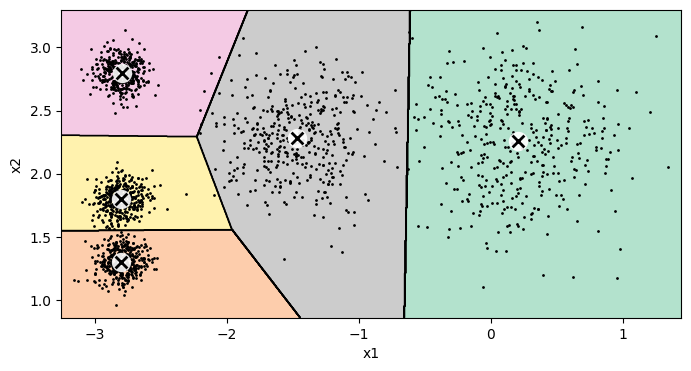

In [14]:
def plot_data(X):
  plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='o', s=35, linewidths=8,
              color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=2, linewidths=12,
              color=cross_color, zorder=11, alpha=1)

def plot_decision_boudaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

  if show_xlabels:
    plt.xlabel("x1")
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("x2")
  else:
    plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boudaries(kmeans, X)
plt.show()

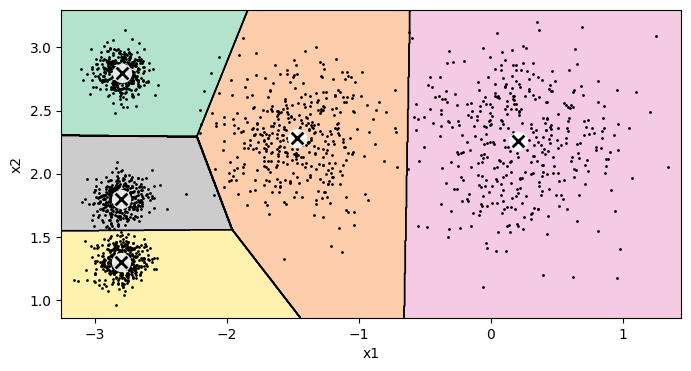

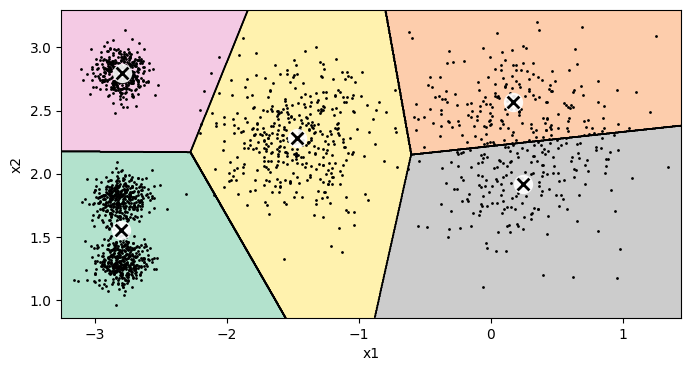

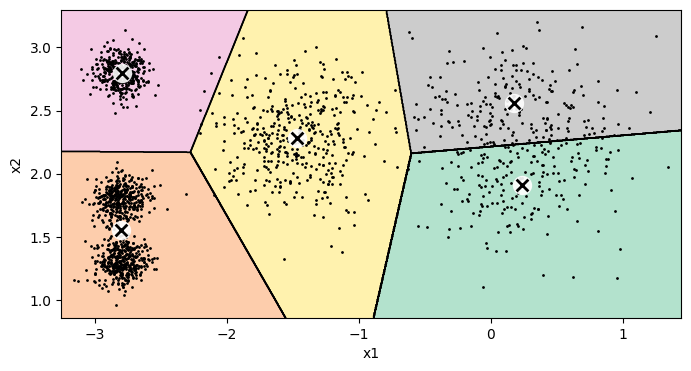

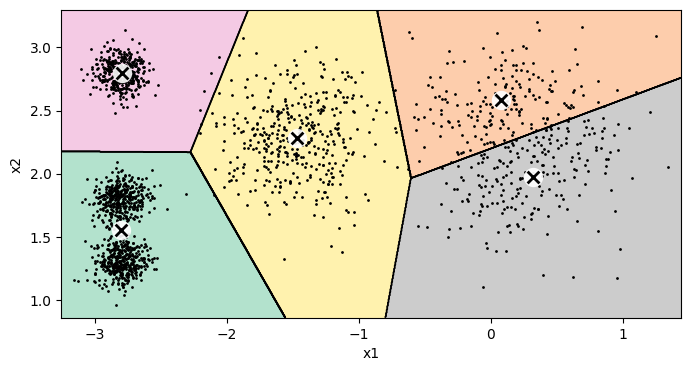

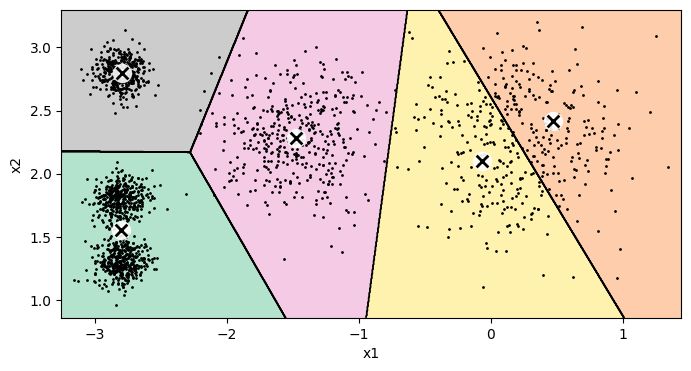

In [15]:
for _ in range(5):
  plt.figure(figsize=(8,4))
  plot_decision_boudaries(KMeans(n_clusters=k, init="k-means++", n_init='auto').fit(X), X)
  plt.show()

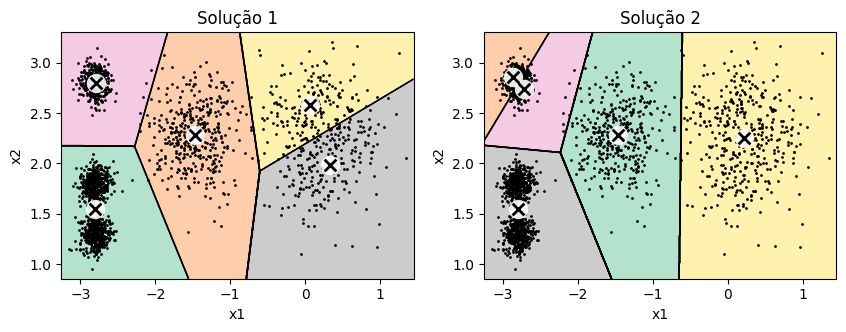

In [23]:
def plot_cluster_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
  clusterer1.fit(X)
  clusterer2.fit(X)
  plt.figure(figsize=(10, 3.2))
  plt.subplot(121)
  plot_decision_boudaries(clusterer1, X)
  if title1:
    plt.title(title1)
  plt.subplot(122)
  plot_decision_boudaries(clusterer2, X)
  if title2:
    plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, random_state=9)

plot_cluster_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                       "Solução 1", "Solução 2")
plt.show()

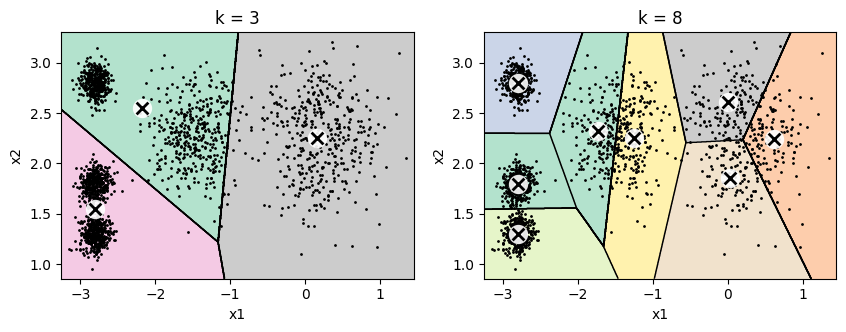

In [24]:
kmeans_k3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init='auto', random_state=42)

plot_cluster_comparison(kmeans_k3, kmeans_k8, X, "k = 3", "k = 8")
plt.show()

In [25]:
kmeans_k3.inertia_

653.2573264005191

In [26]:
kmeans_k8.inertia_

119.6240806663117

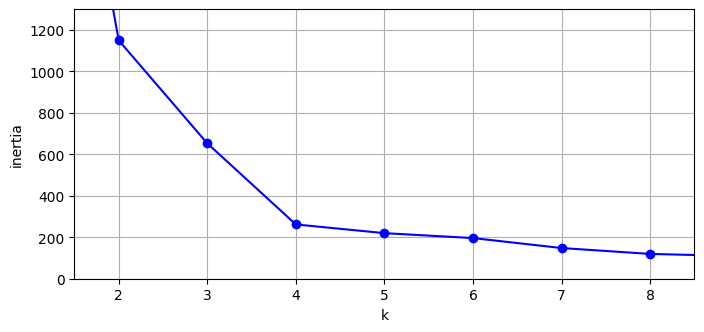

In [28]:
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
                for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.axis([1.5, 8.5, 0, 1300])
plt.grid()
plt.show()

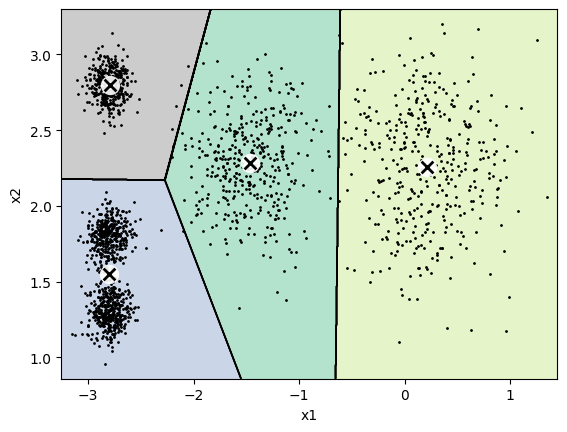

In [29]:
plot_decision_boudaries(kmeans_per_k[4-1], X)
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

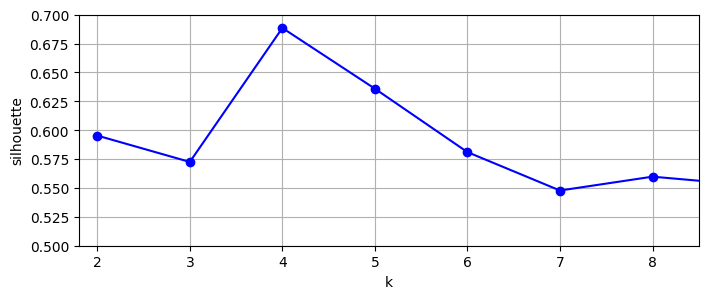

In [34]:
silhouette_scores = [silhouette_score(X, model.labels_)
                      for model in kmeans_per_k[1:]]
plt.figure(figsize=(8,3))
plt.plot(range(2,10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.axis([1.8, 8.5, 0.5, 0.7])
plt.grid()
plt.show()

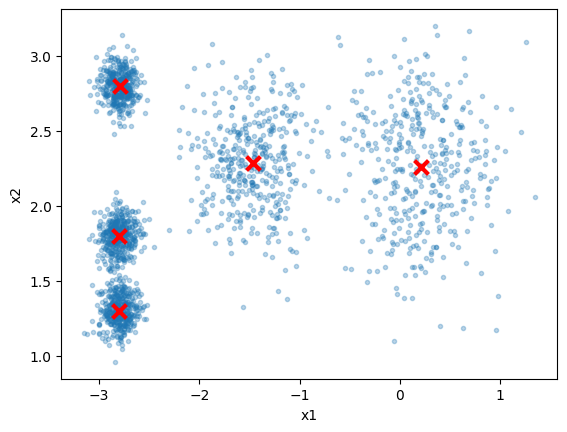

In [50]:
plt.scatter(X[:, 0], X[:, 1], marker=".", alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="x", color="r", s=100, linewidth=3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

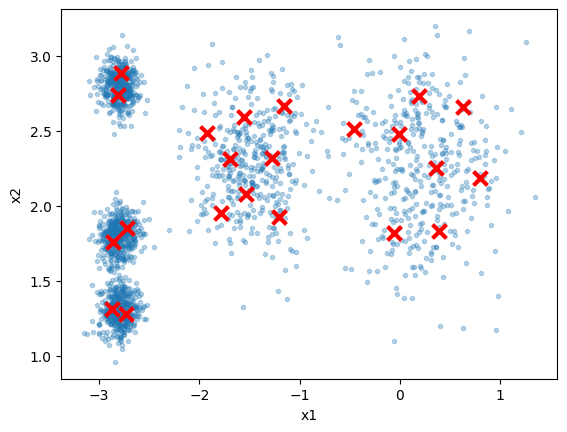

In [55]:
from sklearn.cluster import AffinityPropagation
clusterer = AffinityPropagation(damping=0.97)
clusterer.fit(X)
plt.scatter(X[:, 0], X[:, 1], marker=".", alpha=0.3)
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1],
            marker="x", color="r", s=100, linewidth=3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

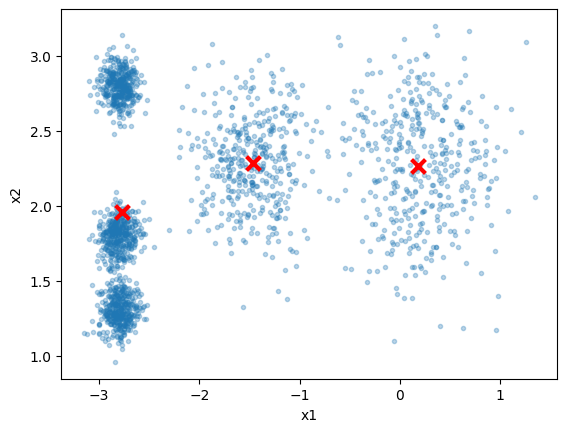

In [56]:
from sklearn.cluster import MeanShift
clusterer = MeanShift()
clusterer.fit(X)
plt.scatter(X[:, 0], X[:, 1], marker=".", alpha=0.3)
plt.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1],
            marker="x", color="r", s=100, linewidth=3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()